In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('dataset/heart.csv')

In [3]:
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
from collections import Counter
Counter(dataset['output'])

Counter({1: 165, 0: 138})

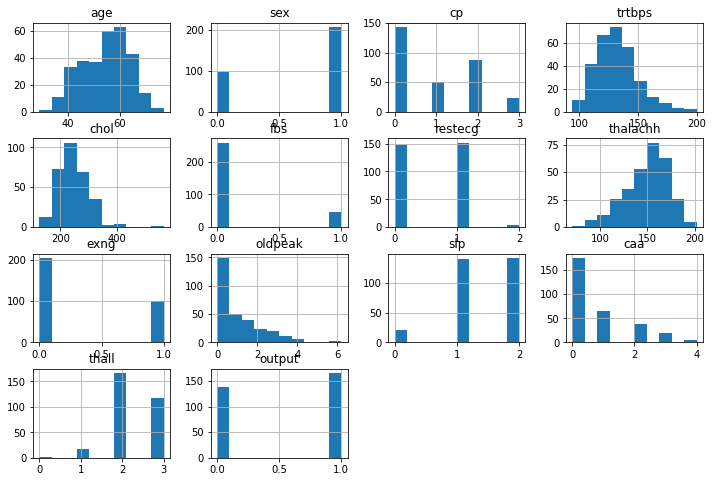

In [35]:
dataset.hist(figsize=(12,8));

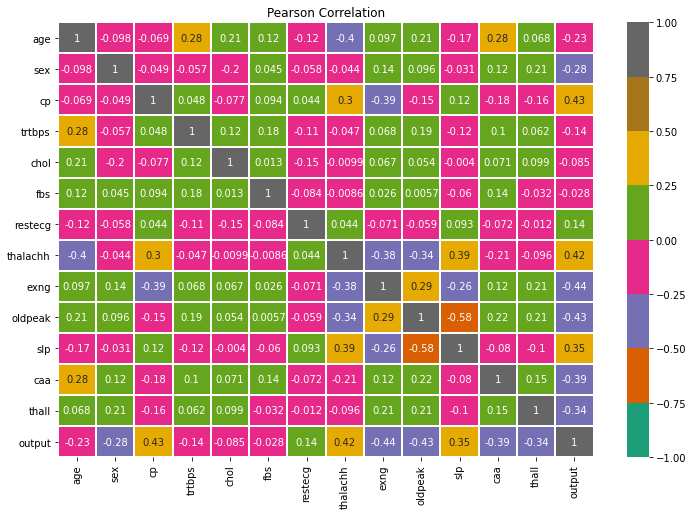

In [44]:
#correlation matrix
corr_Pearson = dataset.corr(method='pearson') #standard correlation coefficient

figure = plt.figure(figsize=(12,8))
sns.heatmap(corr_Pearson,vmin=-1,vmax=+1,cmap='Dark2',annot=True, 
            linewidths=2,linecolor = 'white')
plt.title('Pearson Correlation')
plt.show()

Text(0, 0.5, 'Heart Attack Count')

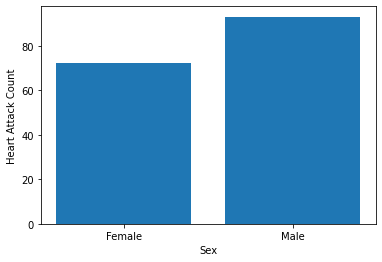

In [48]:

#number of heart atacks among both males and femals
#sorted(dataset['sex'].unique())
plt.bar(['Female','Male'],dataset.groupby('sex').sum()['output'])
plt.xlabel('Sex')
plt.ylabel("Heart Attack Count")

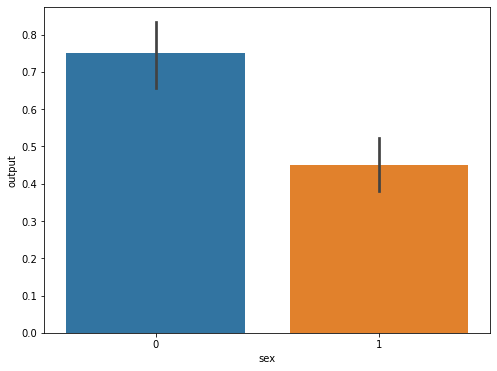

In [49]:
#percentage of males and femals having heart attack
figure = plt.figure(figsize=(8,6))
sns.barplot(x='sex', y='output',data=dataset)
plt.show()

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [51]:
y = dataset['output']

In [52]:
X=dataset.drop('output', axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
clf = DecisionTreeClassifier(max_depth=3)

In [55]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [56]:
y_pred = clf.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

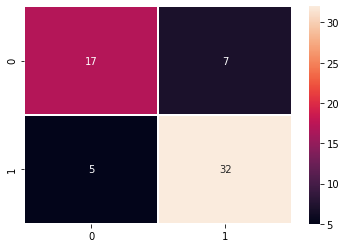

In [69]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,linewidths=2,linecolor = 'white')

In [65]:
clf.score(X_test,y_test)

0.8032786885245902

In [66]:
acc = []
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train,y_train)
    acc.append(clf.score(X_test,y_test))

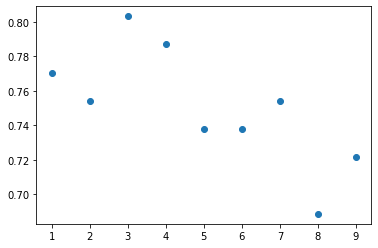

In [67]:
%matplotlib inline
plt.scatter(range(1,10),acc)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

acc = []
for i in range(1,10):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    acc.append(clf.score(X_test,y_test))

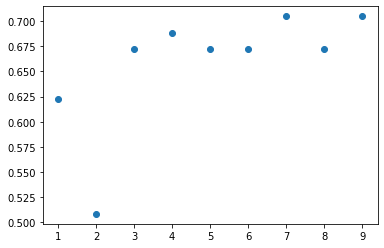

In [71]:
%matplotlib inline
plt.scatter(range(1,10),acc)

In [72]:
from sklearn import svm

In [73]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [74]:
clf.score(X_test,y_test)

0.6721311475409836

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression()

In [77]:
model.fit(X_train, y_train);

c:\users\yasse\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
model.score(X_test,y_test)

0.8032786885245902

In [79]:
y_pred = model.predict(X_test)

<AxesSubplot:>

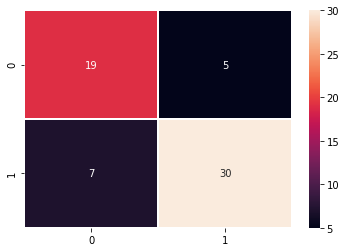

In [80]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,linewidths=2,linecolor = 'white')